In [15]:
# Imports and Setup
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

# has to be set in order to show the image in notebook
%matplotlib inline 

try:
    os.chdir("./Resources")
except:
    pass

In [16]:
y, sr = librosa.load('./youtube-snare-1.wav')
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

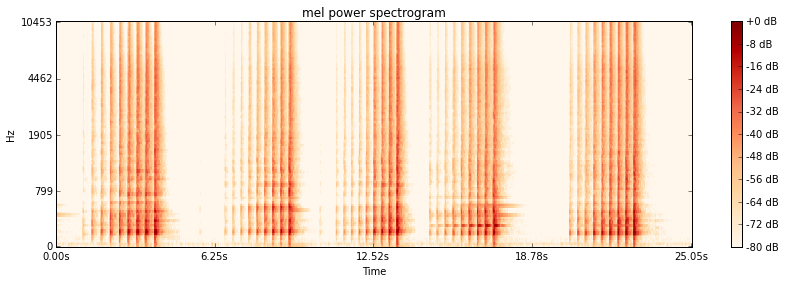

In [17]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

o_env = librosa.onset.onset_strength(y, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [18]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 1081.0, 0.0, 26.614915328749735)

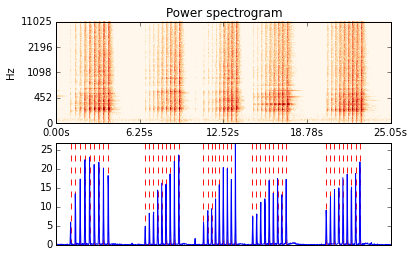

In [19]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [20]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, frame])
    onset_stfts.append(np.abs(D[:, frame]))

[  3.11070124e-07   2.02400838e-06   1.15900748e-05 ...,   7.17772173e-06
   3.36768608e-05   8.20736459e-05]
[  1.87369933e-05   1.78277423e-05   3.41856248e-05 ...,   1.46086456e-03
   7.14922906e-04   1.39614916e-04]
[  6.81462770e-05   1.17231983e-04   4.89186095e-05 ...,   2.78522930e-04
   2.14824872e-03   4.75963636e-04]
[  8.10134734e-05   2.74750288e-04   2.79741391e-04 ...,   9.53044742e-03
   1.51849668e-02   3.20156035e-03]
[ 0.00450879  0.00266156  0.00761946 ...,  0.00432944  0.03285135
  0.05991843]
[ 0.01508677  0.00513326  0.00433305 ...,  0.00456439  0.03216463
  0.00122436]
[ 0.00528398  0.03542274  0.09180884 ...,  0.00343358  0.0164919
  0.00200531]
[ 0.00146441  0.03561376  0.1728549  ...,  0.03520656  0.03234313
  0.0347411 ]
[ 0.01985729  0.16103728  0.52219552 ...,  0.18025166  0.07071303
  0.00245006]
[  1.38250402e-06   3.88954095e-06   1.27699050e-05 ...,   1.68982569e-05
   2.88201295e-06   1.48876370e-05]
[  3.16681849e-06   1.08164922e-05   4.96451139e-05

In [21]:
filename = raw_input()
with open('../Data/' + filename, 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    
    for i in range(len(onset_frames)):
        # onset_stfts is an array of ndarrays so we need to cast to list
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()]) 

youtubeSnareFrames.csv
